## Functional and Pathway Enrichment Analysis

Gene-level differential expression analysis identifies individual genes associated with Duchenne Muscular Dystrophy (DMD), but biological insight emerges from understanding how these genes act collectively within pathways and functional processe.

In this notebook, gene-level differential expression results are leveraged to perform functional and pathway enrichment analyses, with the aim of identifying dysregulated biological systems underlying DMD pathogenesis.


In [1]:
import pandas as pd
import numpy as np

In [3]:
# Load gene-level differential expression results
gene_de = pd.read_csv(
    r"C:\Users\Lenovo\Desktop\UG Stream\Notebooks\03 - Gene_Level_DE_Entrez.csv",
    index_col=0
)
annot_df = pd.read_csv(
    r"C:\Users\Lenovo\Desktop\UG Stream\Notebooks\03 - Probe_to_Gene_Annotation.csv",
    index_col=0
)
gene_de.head()

,mean_log2FC,n_probes
entrez_id,,
4626,8.863631,2
4621,8.624025,1
5320,6.528468,1
4636,6.368076,1
158763,5.804189,1


In [5]:
gene_de.shape

(21180, 2)

In [7]:
gene_de.index.isna().sum()

0

### Definition of Gene Sets for Enrichment Analysis

To enable functional interpretation, genes were stratified based on the direction and magnitude of differential expression. Separate analyses were performed for upregulated and downregulated genes to capture distinct biological processes associated with disease progression and tisse degeneration.

In [10]:
# Sort genes by effect size
gene_de_sorted = gene_de.sort_values("mean_log2FC", ascending=False)

# Define thresholds 
up_genes = gene_de_sorted[gene_de_sorted["mean_log2FC"] > 1].index.tolist()
down_genes = gene_de_sorted[gene_de_sorted["mean_log2FC"] < -1].index.tolist()
up_genes_str = [str(g) for g in up_genes]
down_genes_str = [str(g) for g in down_genes]

len(up_genes), len(down_genes)

(1325, 678)

In [14]:
entrez_to_symbol = (
    annot_df
    .dropna(subset=["entrez_id", "gene_symbol"])
    .set_index("entrez_id")["gene_symbol"]
    .to_dict()
)

In [16]:
up_genes_symbols = [
    entrez_to_symbol[e] 
    for e in up_genes 
    if e in entrez_to_symbol
]

In [18]:
len(up_genes_symbols)

1325

In [22]:
go_up = gp.enrichr(
    gene_list=up_genes_symbols,
    gene_sets="GO_Biological_Process_2021",
    organism="Human",
    outdir=None
)

go_up.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,extracellular matrix organization (GO:0030198),65/300,9.720628e-18,3.961156e-14,0,0,4.047957,158.567702,SPARC;ECM2;COL16A1;ITGAM;COL14A1;ELN;COL12A1;I...
1,GO_Biological_Process_2021,cytokine-mediated signaling pathway (GO:0019221),96/621,4.348411e-15,8.859887e-12,0,0,2.700453,89.301199,IFITM3;CD86;CDKN1A;IFITM1;PLVAP;CXCL9;ITGAM;IF...
2,GO_Biological_Process_2021,extracellular structure organization (GO:0043062),49/216,1.626280e-14,2.005548e-11,0,0,4.255871,135.123451,SPARC;ECM2;COL16A1;ITGAM;COL14A1;ELN;ITGB2;FGF...
3,GO_Biological_Process_2021,external encapsulating structure organization ...,49/217,1.968636e-14,2.005548e-11,0,0,4.230310,133.503706,SPARC;ECM2;COL16A1;ITGAM;COL14A1;ELN;ITGB2;FGF...
4,GO_Biological_Process_2021,cellular response to type I interferon (GO:007...,25/65,1.348248e-13,9.156854e-11,0,0,8.959135,265.502162,IFITM3;IFITM1;IFITM2;IFIT5;IFI6;IFIT1;SAMHD1;I...
5,GO_Biological_Process_2021,type I interferon signaling pathway (GO:0060337),25/65,1.348248e-13,9.156854e-11,0,0,8.959135,265.502162,IFITM3;IFITM1;IFITM2;IFIT5;IFI6;IFIT1;SAMHD1;I...
6,GO_Biological_Process_2021,cellular response to interferon-gamma (GO:0071...,31/121,4.011469e-11,2.180272e-08,0,0,4.947063,118.429128,AIF1;CCL8;CCL5;CASP1;CCL2;NCAM1;CCL18;GBP2;TRI...
7,GO_Biological_Process_2021,inflammatory response (GO:0006954),45/230,4.280288e-11,2.180272e-08,0,0,3.513725,83.888123,PTGFR;SERPINA3;CSF1R;CXCL9;TNFAIP6;C5AR1;ITGB2...
8,GO_Biological_Process_2021,cellular response to cytokine stimulus (GO:007...,71/482,1.683029e-10,7.620380e-08,0,0,2.516025,56.623778,CD86;CDKN1A;ITGAM;IFITM2;DOCK8;ITGB2;F13A1;SLA...
9,GO_Biological_Process_2021,collagen fibril organization (GO:0030199),25/89,3.699977e-10,1.507741e-07,0,0,5.592248,121.449773,COL15A1;COL16A1;COL14A1;COL12A1;DPT;LOXL1;ADAM...


Gene Ontology (GO) Biological Process enrichment analysis was performed on genes upregulated in Duchenne muscular dystrophy (DMD) muscle samples relative to controls. Probe-level differential expression results were first collapsed to gene-level identifiers using Entrez Gene IDs and mapped to HGNC gene symbols to ensure compatibility with the Enrichr GO databases.

The top enriched biological processes were strongly associated with extracellular matrix organization, inflammatory and cytokine-mediated signaling, and interferon responses. These pathways are consistent with known pathological features of DMD, including progressive muscle degeneration, fibrosis, and chronic immune activation.

Enrichment results exhibited strong statistical support, with multiple terms showing adjusted p-values < 1e-10 and substantial gene overlap, indicating robust systems-level transcriptional remodeling in DMD muscle tissue.


In [25]:
down_genes_symbols = [
    entrez_to_symbol[e]
    for e in down_genes
    if e in entrez_to_symbol
]

len(down_genes_symbols), down_genes_symbols[:10]

(678,
 ['TMOD4 /// VPS72',
  'SLC25A11',
  'AES',
  'DLST',
  'GSTM4',
  'RBM42',
  'RELT',
  'HDDC3',
  'RNF19B',
  'EIF4E3'])

In [27]:
go_down = gp.enrichr(
    gene_list=down_genes_symbols,
    gene_sets="GO_Biological_Process_2021",
    organism="Human",
    outdir=None
)

go_down.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,muscle contraction (GO:0006936),17/129,0.000002,0.005012,0,0,4.411201,58.498802,GAMT;MYLK2;CHRNB1;PXN;LMOD1;SORBS1;CLCN1;CKMT2...
1,GO_Biological_Process_2021,regulation of calcium ion transmembrane transp...,7/29,0.000041,0.049287,0,0,9.151876,92.546795,YWHAE;JPH2;PLN;JSRP1;DMD;NOS1;JPH1
2,GO_Biological_Process_2021,negative regulation of peptidyl-serine phospho...,6/21,0.000052,0.049287,0,0,11.492262,113.342981,MLXIPL;DMTN;INPP5J;DMD;GPD1L;SMAD7
3,GO_Biological_Process_2021,2-oxoglutarate metabolic process (GO:0006103),5/14,0.000068,0.049287,0,0,15.942711,152.880221,GOT1;GPT2;GOT2;OGDH;DLST
4,GO_Biological_Process_2021,muscle organ development (GO:0007517),9/58,0.000135,0.054512,0,0,5.291388,47.144548,TBX1;TAGLN;CTF1;SGCA;FHL3;DMD;ANKRD2;EMD;MAPK12
5,GO_Biological_Process_2021,peptidyl-cysteine modification (GO:0018198),4/9,0.000144,0.054512,0,0,22.928190,202.823925,CHCHD4;NOS1;S100A9;S100A8
6,GO_Biological_Process_2021,positive regulation of lipid biosynthetic proc...,7/35,0.000146,0.054512,0,0,7.188525,63.463899,CTDNEP1;MLXIPL;FABP3;MID1IP1;NR1H2;CHP1;SORBS1
7,GO_Biological_Process_2021,regulation of ryanodine-sensitive calcium-rele...,6/25,0.000151,0.054512,0,0,9.070959,79.783004,JPH2;JSRP1;GSTO1;DMD;NOS1;JPH1
8,GO_Biological_Process_2021,glucose metabolic process (GO:0006006),9/62,0.000228,0.071503,0,0,4.891023,41.013917,PFKFB1;GOT1;KCNJ11;DCXR;GOT2;SLC37A4;SLC25A12;...
9,GO_Biological_Process_2021,regulation of membrane depolarization (GO:0003...,5/18,0.000262,0.071503,0,0,11.034975,91.019480,GPD1L;ABCD1;SCN1B;SMAD7;PTPN3


### GO Biological Process Enrichment (Downregulated Genes)

Gene Ontology (GO) Biological Process enrichment analysis was performed on genes downregulated in Duchenne muscular dystrophy (DMD) muscle samples relative to controls. Downregulated genes primarily enriched pathways associated with muscle structure, contraction, and metabolic processes, reflecting the progressive loss of functional muscle tissue characteristic of DMD.

Together with the enrichment results from upregulated genes, these findings highlight a dual transcriptional signature in DMD muscle: activation of inflammatory and extracellular matrix remodeling pathways alongside suppression of normal muscle-specific and bioenergetic functions.


## Data Visualization:

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Select top GO terms by adjusted p-value
top_up = (
    go_up.results
    .sort_values("Adjusted P-value")
    .head(10)
)

# Create plotting values
up_terms = top_up["Term"][::-1]
up_scores = -np.log10(top_up["Adjusted P-value"][::-1])

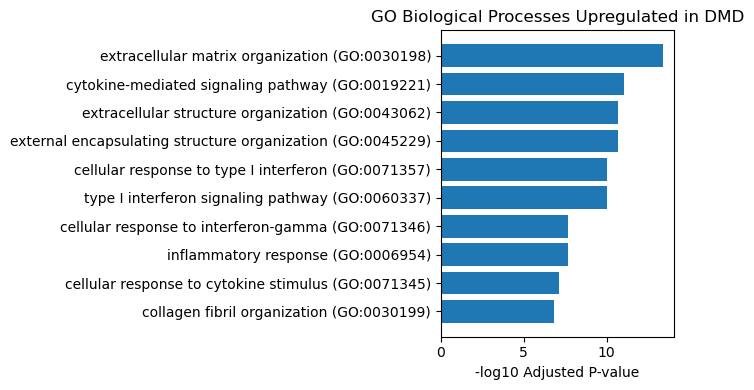

In [35]:
plt.figure(figsize=(7, 4))
plt.barh(up_terms, up_scores)
plt.xlabel("-log10 Adjusted P-value")
plt.title("GO Biological Processes Upregulated in DMD")
plt.tight_layout()
plt.savefig(
    r"C:\Users\Lenovo\Desktop\UG Stream\Notebooks\04 - GO_Biological_Processes_Upregulated_in_DMD.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

Shows inflammatory and ECM activation clearly.

In [38]:
top_down = (
    go_down.results
    .sort_values("Adjusted P-value")
    .head(10)
)

down_terms = top_down["Term"][::-1]
down_scores = -np.log10(top_down["Adjusted P-value"][::-1])

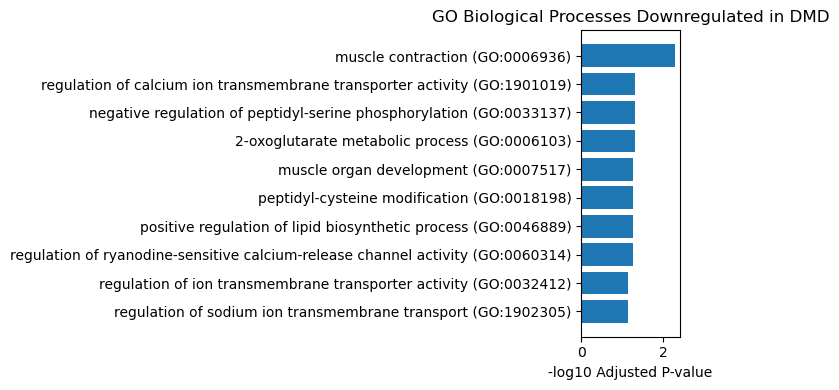

In [40]:
plt.figure(figsize=(7, 4))
plt.barh(down_terms, down_scores)
plt.xlabel("-log10 Adjusted P-value")
plt.title("GO Biological Processes Downregulated in DMD")
plt.tight_layout()
plt.savefig(
    r"C:\Users\Lenovo\Desktop\UG Stream\Notebooks\04 - GO_Biological_Processes_Downregulated_in_DMD.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

Shows loss of muscle function and metabolism.

In [43]:
plot_df = (
    pd.concat([
        top_up.assign(direction="Upregulated")[["Term", "Adjusted P-value", "direction"]],
        top_down.assign(direction="Downregulated")[["Term", "Adjusted P-value", "direction"]]
    ])
)

plot_df["neg_log10_p"] = -np.log10(plot_df["Adjusted P-value"])

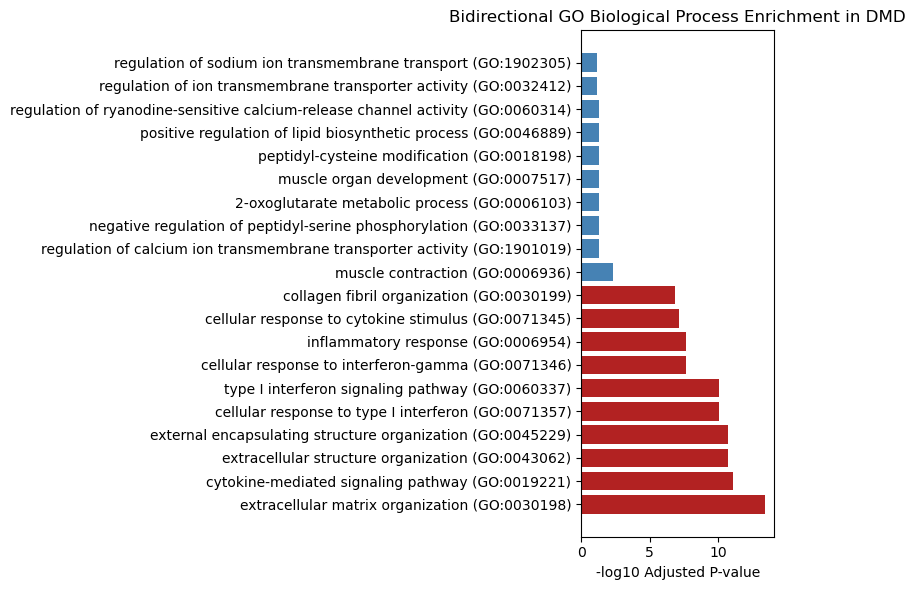

In [45]:
plt.figure(figsize=(8, 6))

colors = plot_df["direction"].map({
    "Upregulated": "firebrick",
    "Downregulated": "steelblue"
})

plt.barh(plot_df["Term"], plot_df["neg_log10_p"], color=colors)
plt.xlabel("-log10 Adjusted P-value")
plt.title("Bidirectional GO Biological Process Enrichment in DMD")
plt.tight_layout()
plt.savefig(
    r"C:\Users\Lenovo\Desktop\UG Stream\Notebooks\04 - GO_Biological_Processes_Bidirectional_in_DMD.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

## Functional Enrichment Visualization

To visualize systems-level transcriptional changes in Duchenne muscular dystrophy (DMD), Gene Ontology (GO) Biological Process enrichment results were plotted separately for upregulated and downregulated genes. Bar plots of the top enriched processes were generated using the –log10 adjusted p-value as a measure of enrichment significance, enabling direct comparison of dominant biological themes associated with disease pathology.


## Notebook 04 - Summary of Functional Enrichment Analysis

In this notebook, gene-level functional enrichment analysis was performed to interpret the systems-level transcriptional changes observed in Duchenne muscular dystrophy (DMD) muscle tissue. Probe-level differential expression results were first collapsed to gene-level identifiers, and Gene Ontology (GO) Biological Process enrichment analysis was conducted separately for genes upregulated and downregulated in DMD relative to control samples.

Upregulated genes showed strong enrichment for pathways related to extracellular matrix organization, inflammatory and cytokine-mediated signaling, and interferon responses, reflecting fibrosis, immune activation, and tissue remodeling processes characteristic of DMD pathology. In contrast, downregulated genes were enriched for biological processes associated with muscle contraction, calcium handling, membrane depolarization, and metabolic pathways, indicating a loss of normal muscle function and bioenergetic capacity.

These enrichment results were visualized using bar plots of the top GO Biological Processes, enabling a clear comparison between pathological pathway activation and suppression of muscle-specific functions. Together, these findings highlight a coordinated, bidirectional transcriptional remodeling in DMD muscle tissue.

## Next Steps

While the analyses performed thus far characterize global disease-associated transcriptional changes, DMD is a progressive disorder with distinct molecular alterations across disease stages. In the next notebook, samples will be stratified based on age and disease stage (early, mid, late), and stage-specific differential expression and pathway enrichment analyses will be conducted. This will enable investigation of how inflammatory, fibrotic, and muscle-specific pathways evolve over the course of disease progression, providing deeper insight into stage-dependent molecular mechanisms and potential therapeutic targets.
.
